**Data Collection:**

This section prepares the environment by updating the list of available software packages and then installing a specific tool called megatools.

In [ ]:
!sudo apt-get update
!sudo apt-get install -y megatools

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,931 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,245 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2

This code downloads our TheLibrarianFromAlexandria zip file containing images from MEGA to manage storage efficiently. The file was first downloaded from Luiss Learn.

In [ ]:
!megadl "https://mega.nz/file/pPVRhB7S#V7SWr06PwyHs7niw5M7zmYUqKWvh5vq20CZfhH3KUAY"

Downloaded TheLibrarianFromAlexandria.zip


This section unzips the file 'TheLibrarianFromAlexandria.zip'.

In [ ]:
!unzip TheLibrarianFromAlexandria.zip

Archive:  TheLibrarianFromAlexandria.zip
   creating: img/
 extracting: img/aer_arbor_gravis_c840a1c9.jpg  
 extracting: img/aer_audacia_virtus_8799eb51.jpg  
 extracting: img/aer_bellum_clarus_553916a2.jpg  
 extracting: img/aer_fides_color_9be7cd18.jpg  
 extracting: img/aer_fortis_cantus_734c6d35.jpg  
 extracting: img/aer_gemma_voluntas_32dd9093.jpg  
 extracting: img/aer_luna_imber_eda8dda2.jpg  
 extracting: img/aer_pulcher_serenus_f5cadcf5.jpg  
 extracting: img/aer_regnum_veritas_6a7cb4fa.jpg  
 extracting: img/aer_salus_mors_a65ba262.jpg  
 extracting: img/aer_sapientia_caligo_8ff8067b.jpg  
 extracting: img/aer_spiritus_tempestas_cc80dc1c.jpg  
 extracting: img/aer_tempus_verbum_250d7507.jpg  
 extracting: img/aer_terra_aqua_582598dd.jpg  
 extracting: img/aer_ventus_arbor_6ca31690.jpg  
 extracting: img/aer_victoria_formosus_5037e1c6.jpg  
 extracting: img/altus_arbor_lux_7b22abc2.jpg  
 extracting: img/altus_color_herba_4ee4a47f.jpg  
 extracting: img/altus_constantia_sapor

**Exploratory Data Analysis (EDA):**

This code block focuses on loading and preparing the dataset for the project. It loads the data from the pages.csv file into a pandas DataFrame named font_csv. It assigns the column names 'image_path' and 'font' to the two columns in the file. The output displays the first five rows of the font_csv DataFrame, using the font_csv.head() command. The output confirms that the CSV file was loaded correctly and the path cleaning step was successful.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError
import numpy as np

# Paths in Colab
csv_path = '/content/pages.csv'
image_folder = '/content/img'

# Load the CSV
font_csv = pd.read_csv(csv_path, header=None, names=['image_path', 'font'])

# Clean image paths (remove 'img\\' or 'img/' from the beginning if exists)
font_csv['image_path'] = font_csv['image_path'].str.replace(r'^img[\\/]', '', regex=True)

# Preview data
font_csv.head()


,image_path,font
0,prudentia_herba_decorus_8fa9e210.jpg,vesta
1,salus_concordia_nubes_a8be0a38.jpg,vesta
2,tempus_arbor_sapor_b6bf900d.jpg,vesta
3,altus_constantia_sapor_93266b7c.jpg,vesta
4,bellum_fortis_claritas_59599435.jpg,vesta


Now we load the dataset and perform initial validation checks to ensure the integrity and consistency of the image files and their corresponding metadata. We load the CSV file containing image paths and font labels, and verify that all listed images are present in the designated directory. The result confirms that our dataset is complete and well-aligned, with no discrepancies.

In [ ]:
import os
# Set of filenames
images_in_folder = set(os.listdir(image_folder))
images_in_csv = set(font_csv['image_path'])

# Compare sets
missing = images_in_csv - images_in_folder
extra = images_in_folder - images_in_csv

print(f"Images listed in CSV: {len(images_in_csv)}")
print(f"Images found in folder: {len(images_in_folder)}")
print(f"Missing images: {len(missing)}")
print(f"Extra images not in CSV: {len(extra)}")


Images listed in CSV: 1256
Images found in folder: 1256
Missing images: 0
Extra images not in CSV: 0


This code block analyzes and visualizes with a bar plot the distribution of different font classes within our dataset. We can see that some fonts like aureus are more represented in the dataset than others but overall the fonts are not too unbalanced.

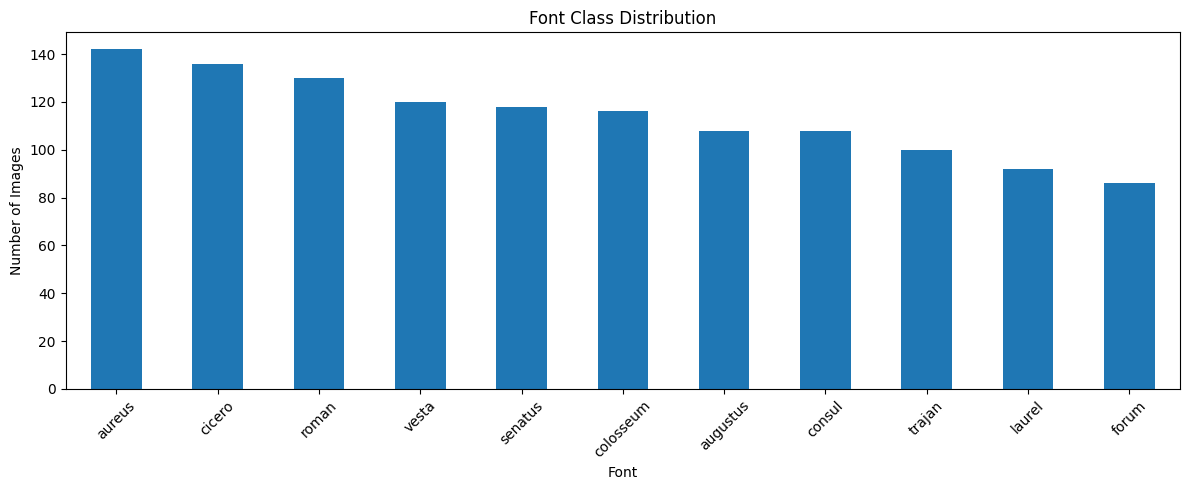

In [ ]:
font_counts = font_csv['font'].value_counts()

plt.figure(figsize=(12, 5))
font_counts.plot(kind='bar')
plt.title('Font Class Distribution')
plt.xlabel('Font')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This code calculates and displays the total count of images for each unique font label. Then, it identifies the font classes that have fewer than a defined threshold of samples (in this case, 100). Laurel and forum fonts are less represented.

In [ ]:
# Count samples per font
font_counts = font_csv['font'].value_counts()
print(font_counts)

# Find fonts with < threshold samples (e.g., < 100)
underrepresented_fonts = font_counts[font_counts < 100].index.tolist()
print("Underrepresented fonts:", underrepresented_fonts)

font
aureus       142
cicero       136
roman        130
vesta        120
senatus      118
colosseum    116
augustus     108
consul       108
trajan       100
laurel        92
forum         86
Name: count, dtype: int64
Underrepresented fonts: ['laurel', 'forum']


This code block analyzes the dimensions of the images in the dataset. This method generates descriptive statistics for the 'width' and 'height' columns, providing insights into the distribution of image dimensions (count, mean, standard deviation, minimum, maximum, and quartiles). We notice that the width and height variables vary a lot in the dataset.

In [ ]:
image_sizes = []

for filename in font_csv['image_path']:
    try:
        with Image.open(os.path.join(image_folder, filename)) as img:
            image_sizes.append(img.size)
    except Exception as e:
        print(f" Error reading {filename}: {e}")

# Convert to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
print(sizes_df.describe())

              width       height
count   1256.000000  1256.000000
mean    4776.979299  4826.546975
std     2195.590445  1350.567322
min     1540.000000  2069.000000
25%     3129.750000  3776.000000
50%     4183.500000  4820.500000
75%     6341.750000  5720.250000
max    12530.000000  8603.000000


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96819327 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103811050 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96828297 pixels) exceeds limit of 89478485 pixels, could be decompression bomb D

We visualize with a histogram the width and height distributions across pixels ranges.

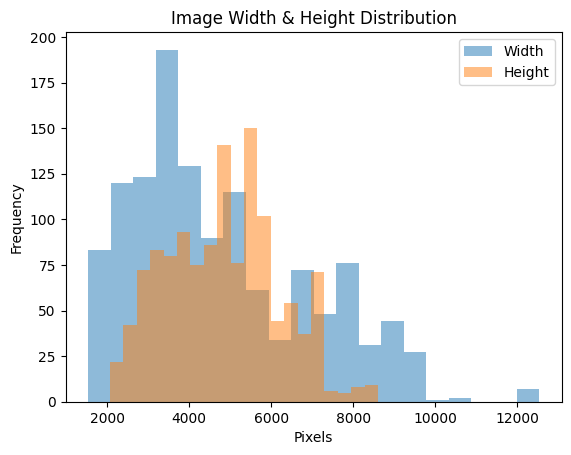

In [ ]:
# Plot histograms
sizes_df['width'].plot(kind='hist', bins=20, alpha=0.5, label='Width')
sizes_df['height'].plot(kind='hist', bins=20, alpha=0.5, label='Height')
plt.title('Image Width & Height Distribution')
plt.xlabel('Pixels')
plt.legend()
plt.show()

This code checks for duplicate entries and unreadable entries. The output indicates that every image path listed in our font_csv file is unique, meaning there are no redundant entries pointing to the same image file.
in addition, the code did not encounter any files that were unreadable, corrupted.

In [ ]:
# Duplicate image entries
duplicates = font_csv[font_csv.duplicated('image_path')]
print(f"Duplicate entries in CSV: {len(duplicates)}")

# Corrupt/unreadable images
corrupt_images = []

for filename in font_csv['image_path']:
    try:
        img = Image.open(os.path.join(image_folder, filename))
        img.verify()  # only checks if file is okay, not readable
    except (UnidentifiedImageError, FileNotFoundError, OSError):
        corrupt_images.append(filename)

print(f"Corrupt or unreadable images: {len(corrupt_images)}")


Duplicate entries in CSV: 0
Corrupt or unreadable images: 0


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96819327 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103811050 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96828297 pixels) exceeds limit of 89478485 pixels, could be decompression bomb D

The preprocessing phase, defined by the preprocess_image function, is used to transform the raw image data into a format suitable for our model. First it converts the image to grayscale to reduce complexity, then uses Gaussian blur for denoising, followed by Otsu's thresholding to binarize the image and separate text from the background. Finally, the image is resized to a standard dimension (e.g., 128x128) to ensure consistent input size for the model.

In [ ]:
#Preprocessing steps (grayscale conversion, binarization, noise)
import cv2

def preprocess_image(path, size=(128, 128)):
    # Load image in grayscale
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        return None

    # Denoise with Gaussian blur
    img = cv2.GaussianBlur(img, (3, 3), 0)

    # Binarize using Otsu's threshold
    _, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Resize to standard size
    img = cv2.resize(img, size)

    return img

We visually inspect the output of the preprocessing steps on a few sample images (3) from the dataset. The images are blurry because of they are optimized for a machine learning model not for human visual clarity.

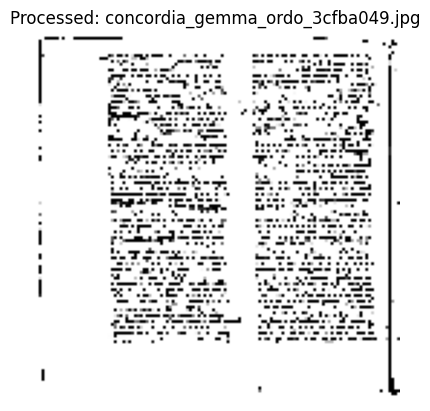

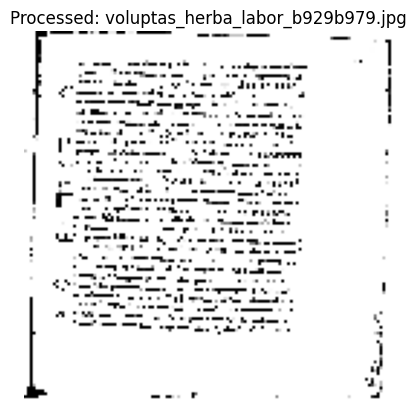

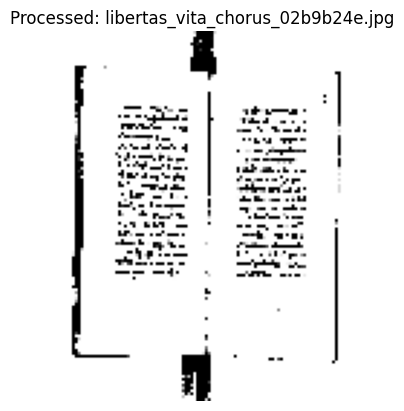

In [ ]:
import matplotlib.pyplot as plt

# Show a few samples
sample_paths = font_csv['image_path'].sample(3).values

for file in sample_paths:
    full_path = os.path.join(image_folder, file)
    processed_img = preprocess_image(full_path)

    if processed_img is not None:
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Processed: {file}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Could not process {file}")


For human visual inspection we increase the target size (512,512) for the final resizing step. The font of the text is now more visible to a human eye.

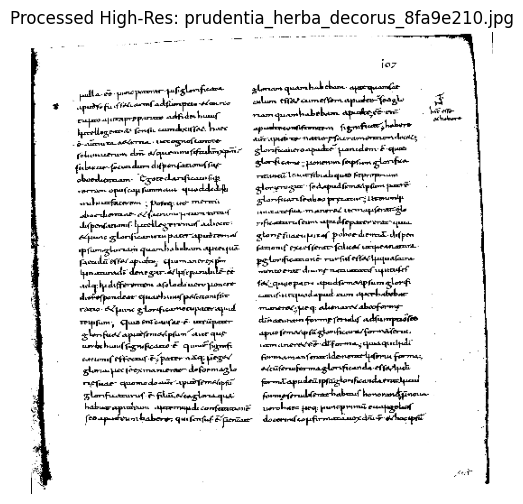

In [ ]:
import os
import matplotlib.pyplot as plt

# Choose any image from the dataset
sample_file = font_csv['image_path'].iloc[0]
full_path = os.path.join(image_folder, sample_file)

# Preprocess the image in high-res
processed_img = preprocess_image(full_path, size=(512, 512))

# Display the processed image
if processed_img is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(processed_img, cmap='gray')
    plt.title(f"Processed High-Res: {sample_file}")
    plt.axis('off')
    plt.show()
else:
    print(" Could not process image.")


The dataset is split into training and testing sets using scikit-learn's train_test_split function. A standard 80/20 ratio is used, allocating 80% of the data for training the model and 20% for evaluating its performance on unseen data. Stratification is used based on the font labels, ensuring that the proportion of each font class is maintained in both the training and testing sets. The random state is set to 42 for reproducibilty reasons. The output shows 1004 samples in the training set and 252 in the test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets before augmentation (we leave test set as-is and augment the training set)
train_df, test_df = train_test_split(font_csv, test_size=0.2, stratify=font_csv['font'], random_state=42)

print(f"Training samples: {len(train_df)}")
print(f"Test samples: {len(test_df)}")

Training samples: 1004
Test samples: 252


This code block organizes the image files into labeled-based folders, necessary for Keras’ ImageDataGenerator.flow_from_directory() which expects images to be stored in a certain way.

In [ ]:
import shutil
from tqdm import tqdm

def organize_images(df, base_path):
    if os.path.exists(base_path):
        shutil.rmtree(base_path)
    os.makedirs(base_path)

    for _, row in tqdm(df.iterrows(), total=len(df)):
        label = row['font']
        src = os.path.join(image_folder, row['image_path'])
        dst_dir = os.path.join(base_path, label)
        os.makedirs(dst_dir, exist_ok=True)
        dst = os.path.join(dst_dir, row['image_path'])
        shutil.copy(src, dst)

# Apply to train and test
organize_images(train_df, '/content/final_dataset/train')
organize_images(test_df, '/content/final_dataset/test')


100%|██████████| 252/252 [00:06<00:00, 37.17it/s]


**Data Augmentation and Model Development**:

Model 1.

This code block sets up a data generator that applies augmentation in real-time while training. These augmentations include applying random rotations, zooms, horizontal and vertical shifts, shearing, and horizontal and vertical flips, with new pixels filled using the 'nearest' strategy. It also loads images in grayscale, resizes them to a consistent target_size of pixels, groups them into batch_size batches (32), prepares the labels in a categorical format suitable for classification, and shuffles the data. Seed set to 42 for reproducibilty.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
train_data = train_gen.flow_from_directory(
    '/content/final_dataset/train',
    target_size=(224,224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)

Found 1004 images belonging to 11 classes.


No augmentation is done for the test set because we want to evaluate on original images. Keeps image order fixed, so predictions align with filenames/labels.

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_data = test_gen.flow_from_directory(
    '/content/final_dataset/test',
    target_size=(224,224),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 252 images belonging to 11 classes.


Visualize 5 augmented training images. By looking at them one can notice that they are zoomed, flipped, shifted, or rotated.

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103761340 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


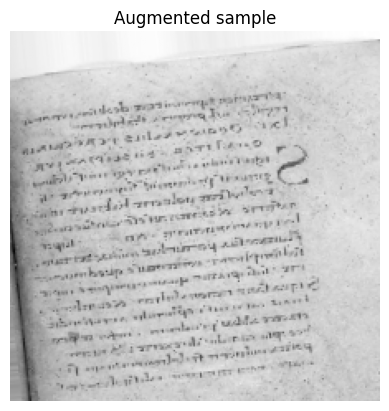

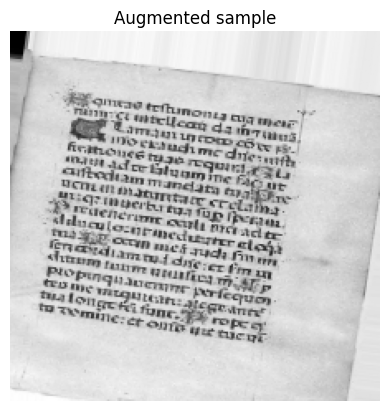

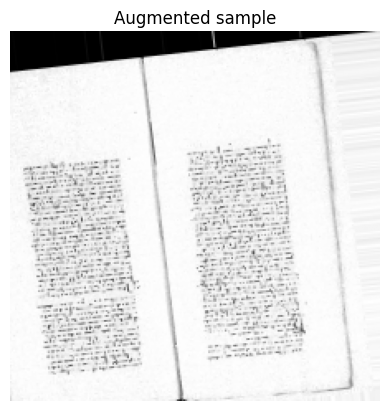

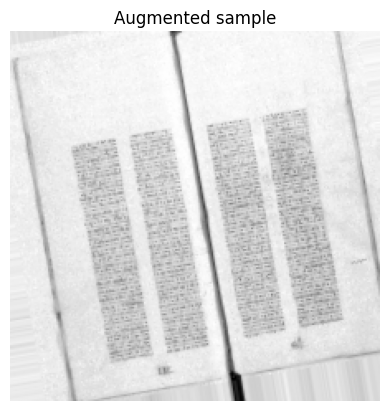

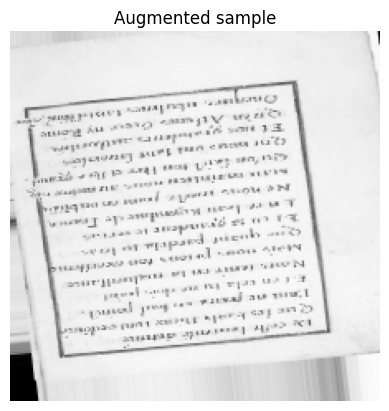

In [ ]:
for _ in range(5):
    img_batch, label_batch = next(train_data)
    plt.imshow(img_batch[0].squeeze(), cmap='gray')
    plt.title("Augmented sample")
    plt.axis('off')
    plt.show()

This code defines a Convolutional Neural Network (CNN) using Keras's sequential model. Various layers are stacked on top of eachother. Two consecutive Conv2D layers are used to extract relevant spatial features, paired with BatchNormalization for training stability, and MaxPooling2D for downsampling. Our hope is that these sequential convolutional blocks learn progressively more complex features. The last layers flattens the 2D input to a 1D vector and feeds it into a fully connected layer including a Dropout. The final Dense layer outputs a probability distribution over the 11 fonts using softmax function. Adam optimizer is used with low learning rate, categorical crossentropy as the loss function for the learning process, and accuracy as the evaluation metric. The output shows the model's layers shape and parameter count.

In [ ]:
# 1. Import everything
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Resizing
from tensorflow.keras.optimizers import Adam

# 2. Define CNN model
model = Sequential([

    # Block 1
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Block 2
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Block 3
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Block 4
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Classifier head
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# 3. Compile model
model.compile(
    optimizer=Adam(learning_rate=2e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             

 Total params: 14,023,659 (53.50 MB)

 Trainable params: 14,021,739 (53.49 MB)

 Non-trainable params: 1,920 (7.50 KB)

The code starts the training with some callback to monitor and control progress. It utilizes EarlyStopping and ReduceLROnPlateau from Keras. EarlyStopping monitors validation loss and stops training if it doesn't improve after 8 consecutive epochs, which helps with overfitting. ReduceOnPlateau also monitors validation loss and reduces the learning rate by half if the validation loss doesn't improve for 4 epochs. The maximum epochs is set to 50. The accuracy for both training and test reach over 0.6.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# 1. Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=4,
    factor=0.5,
    verbose=1
)

# 2. Train
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=50,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
 3/32 ━━━━━━━━━━━━━━━━━━━━ 7:08 15s/step - accuracy: 0.0672 - loss: 9.0931

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96819327 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


25/32 ━━━━━━━━━━━━━━━━━━━━ 2:28 21s/step - accuracy: 0.1193 - loss: 7.8022

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96828297 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.1289 - loss: 7.2008 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 763s 23s/step - accuracy: 0.1301 - loss: 7.1270 - val_accuracy: 0.0873 - val_loss: 4.1578 - learning_rate: 2.0000e-04
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 773s 24s/step - accuracy: 0.1773 - loss: 2.3137 - val_accuracy: 0.0873 - val_loss: 4.9661 - learning_rate: 2.0000e-04
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 775s 24s/step - accuracy: 0.2269 - loss: 2.1545 - val_accuracy: 0.0873 - val_loss: 7.9257 - learning_rate: 2.0000e-04
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 806s 25s/step - accuracy: 0.2633 - loss: 2.1307 - val_accuracy: 0.0873 - val_loss: 10.1673 - learning_rate: 2.0000e-04
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 22s/step - accuracy: 0.2446 - loss: 2.2216 
Epoch 5: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-05.
32/32 ━━━━━━━━━━━━━━━━━━━━ 757s 24s/step - accuracy: 0.2444 - loss: 2.2211 - val_accuracy: 0.0873 - val_loss: 11.0690 - learning_rate: 2.0000e-04
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 749s 23s/step - accuracy: 0.2586 - loss: 

Save the entire model (architecture + weights + optimizer)

In [ ]:
model.save('/content/cnn_model.h5')

**Model 2 with Augmentation**:

The code sets up the data augmentation for the second model. It defines parameters like image size, batch size, and a seed for reproducibility. It then defines two ImageDataGenerator function one for training one for testing. To the train_gen is applied augmentation techniques (including rotation, shifting, zooming, and adding brightness variations) and valid_test_gen has no augmentation for consistent validation and testing. The color_mode is 'rgb' (loading images as 3 channels) and class_mode to 'raw' (using raw label IDs) for both generators, which is a significant change from working with grayscale/binary images and categorical labels previyously.

In [ ]:
#Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

train_dir = "/content/final_dataset/train"

# Recreate the DataFrame manually from flow_from_directory
filepaths = train_data.filepaths
labels = train_data.labels

# Create DataFrame
train_df = pd.DataFrame({
    "image_path": filepaths,
    "font_id": labels
})

test_dir = "/content/final_dataset/test"

# Use filepaths and labels from the test_data generator
test_filepaths = test_data.filepaths
test_labels = test_data.labels

# Create the DataFrame
test_df = pd.DataFrame({
    "image_path": test_filepaths,
    "font_id": test_labels
})

# 1. Define image size, batch size, seed
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# 2. Training generator with same augmentation
train_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.85, 1.15],
    fill_mode='nearest'
)

# 3. Validation/Test generator (no augmentation)
valid_test_gen = ImageDataGenerator()

# 4. Load the data using flow_from_dataframe
train_data = train_gen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='font_id',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='raw',
    shuffle=True,
    seed=SEED
)

test_data = valid_test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='font_id',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='rgb',
    class_mode='raw',
    shuffle=False
)


Found 1004 validated image filenames.
Found 252 validated image filenames.


This code block defines a function, create_transfer_learning_model, which constructs a convolutional neural network model with transfer learning. The function allows to choose from popular pre-trained architectures like ResNet50, MobileNetV2, or EfficientNetB0, loading weights trained on the vast ImageNet dataset. It then freezes a specific part of the base model's layers to preserve the general features they learned, while adding new layers on top.

In [ ]:

import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50, MobileNetV2, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications.efficientnet import preprocess_input


# Constants
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 11
FREEZE_RATIO = 0.8
BATCH_SIZE = 16
MAX_EPOCHS = 50
MODEL_DIR = './models'
OUTPUT_DIR = './output'

def create_transfer_learning_model(num_classes=NUM_CLASSES, base_model_name='efficientnet'):
    if base_model_name == 'resnet':
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
        preprocess_input = tf.keras.applications.resnet50.preprocess_input
    elif base_model_name == 'mobilenet':
        base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
    elif base_model_name == 'efficientnet':
        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)
        preprocess_input = tf.keras.applications.efficientnet.preprocess_input
    else:
        raise ValueError(f"Unsupported model: {base_model_name}")

    # Freeze a portion of the base model
    total_layers = len(base_model.layers)
    for layer in base_model.layers[:int(total_layers * FREEZE_RATIO)]:
        layer.trainable = False

    # Build model
    model = Sequential([
        layers.Lambda(lambda x: preprocess_input(x), input_shape=INPUT_SHAPE),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

This part defines the train_and_evaluate function, which sets up the process of training the transfer learning model and assessing its performance.

In [ ]:
def train_and_evaluate(model, train_generator, valid_generator, test_generator, id_to_label):
    os.makedirs(MODEL_DIR, exist_ok=True)
    os.makedirs(OUTPUT_DIR, exist_ok=True)

    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True, verbose=1),
        ModelCheckpoint(filepath=os.path.join(MODEL_DIR, 'best_transfer_model.keras'),
                        monitor='val_accuracy', save_best_only=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
    ]

    steps_per_epoch = max(1, len(train_generator.filenames) // BATCH_SIZE)
    validation_steps = max(1, len(valid_generator.filenames) // BATCH_SIZE)

    print(f"\nStarting transfer learning for up to {MAX_EPOCHS} epochs...\n")
    history = model.fit(
        train_generator,
        epochs=MAX_EPOCHS,
        validation_data=valid_generator,
        callbacks=callbacks,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=1
    )

    # Evaluation on test set
    test_generator.reset()
    test_steps = (len(test_generator.filenames) + BATCH_SIZE - 1) // BATCH_SIZE
    test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)
    print(f"Test Accuracy: {test_acc:.4f}")

    # Predictions
    predictions, true_labels = [], []
    for _ in range(test_steps):
        x_batch, y_batch = next(test_generator)
        y_pred = model.predict_on_batch(x_batch)
        predictions.extend(np.argmax(y_pred, axis=1))
        true_labels.extend(np.round(y_batch).astype(int))

    y_pred = predictions[:len(test_generator.filenames)]
    y_true = true_labels[:len(test_generator.filenames)]

    # Convert IDs to class labels
    y_pred_labels = [id_to_label[idx] for idx in y_pred]
    y_true_labels = [id_to_label[idx] for idx in y_true]

    # Classification report
    report = classification_report(y_true_labels, y_pred_labels)
    print("\nClassification Report:\n", report)

    with open(os.path.join(OUTPUT_DIR, 'classification_report.txt'), 'w') as f:
        f.write(report)

    conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
    return history, conf_matrix, y_true_labels, y_pred_labels

This code snippet first extracts the font name for each image then creates a dictionary called id_to_font that maps each unique numerical font ID to its corresponding font name. The mapping dictionary is printed as output.

In [ ]:
# Extract font names
train_df['font_name'] = train_df['image_path'].apply(lambda x: os.path.basename(os.path.dirname(x)))

#mapping from font_id to font_name
id_to_font = train_df.drop_duplicates('font_id').set_index('font_id')['font_name'].to_dict()

print(id_to_font)


{0: 'augustus', 1: 'aureus', 2: 'cicero', 3: 'colosseum', 4: 'consul', 5: 'forum', 6: 'laurel', 7: 'roman', 8: 'senatus', 9: 'trajan', 10: 'vesta'}


This part calls the create_transfer_learning_model function, specifying EfficientNet as the pre-trained base architecture. Subsequently, it calls the train_and_evaluate function. The training starts and during training it monitors with callbacks and saves best the model weight automatically while training. After training it evaluates with accuracy, precision, recall, f1 score the model. The overall test accuracy is 0.96. which is an excellent result compared to the other model.

In [ ]:
 # 1. Create the model
model = create_transfer_learning_model(
    num_classes=NUM_CLASSES,
    base_model_name='efficientnet'
)
# 2. Train and evaluate
history, conf_matrix, y_true_labels, y_pred_labels = train_and_evaluate(
    model=model,
    train_generator=train_data,
    valid_generator=test_data,
    test_generator=test_data,
    id_to_label=id_to_font
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Starting transfer learning for up to 50 epochs...



/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103761340 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103811050 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1/50
 1/62 ━━━━━━━━━━━━━━━━━━━━ 35:32 35s/step - accuracy: 0.0000e+00 - loss: 4.1191

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96828297 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


12/62 ━━━━━━━━━━━━━━━━━━━━ 6:05 7s/step - accuracy: 0.1657 - loss: 3.1924

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103857120 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


26/62 ━━━━━━━━━━━━━━━━━━━━ 4:27 7s/step - accuracy: 0.2778 - loss: 2.7199

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (96819327 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


32/62 ━━━━━━━━━━━━━━━━━━━━ 3:41 7s/step - accuracy: 0.3091 - loss: 2.5854

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(



Epoch 1: val_accuracy improved from -inf to 0.45238, saving model to ./models/best_transfer_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 344s 5s/step - accuracy: 0.3803 - loss: 2.2789 - val_accuracy: 0.4524 - val_loss: 1.6645 - learning_rate: 0.0010
Epoch 2/50
32/62 ━━━━━━━━━━━━━━━━━━━━ 3:57 8s/step - accuracy: 0.6890 - loss: 0.9961
Epoch 2: val_accuracy improved from 0.45238 to 0.57540, saving model to ./models/best_transfer_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 319s 5s/step - accuracy: 0.6939 - loss: 0.9573 - val_accuracy: 0.5754 - val_loss: 1.2618 - learning_rate: 0.0010
Epoch 3/50
32/62 ━━━━━━━━━━━━━━━━━━━━ 3:59 8s/step - accuracy: 0.7917 - loss: 0.6280
Epoch 3: val_accuracy improved from 0.57540 to 0.65079, saving model to ./models/best_transfer_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 339s 5s/step - accuracy: 0.7874 - loss: 0.6430 - val_accuracy: 0.6508 - val_loss: 1.0009 - learning_rate: 0.0010
Epoch 4/50
32/62 ━━━━━━━━━━━━━━━━━━━━ 3:41 7s/step - accuracy: 0.8301 - loss: 0.5161
Epoch 

**Evaluation & Insights:**

Using load_model to load the first model.

In [ ]:
from tensorflow.keras.models import load_model
from keras.config import enable_unsafe_deserialization

enable_unsafe_deserialization()

# load model
best_model = load_model('/content/cnn_model.h5')

Using Matplotlib the code generates two separate plots: one illustrating how both the training and validation accuracy changed across the training epochs, and another showing the progression of both the training and validation loss over the same epochs.

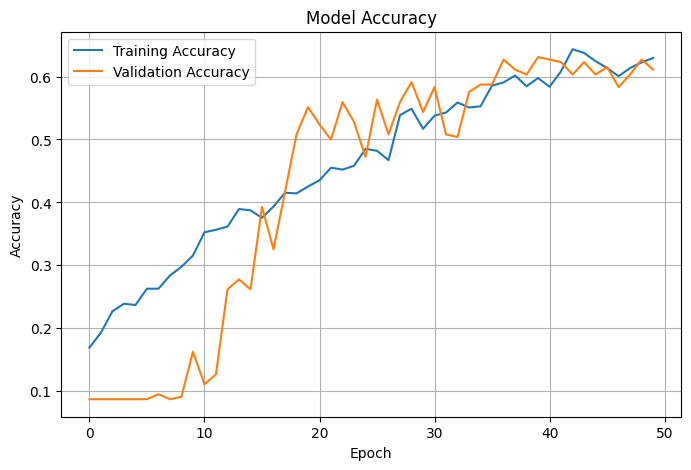

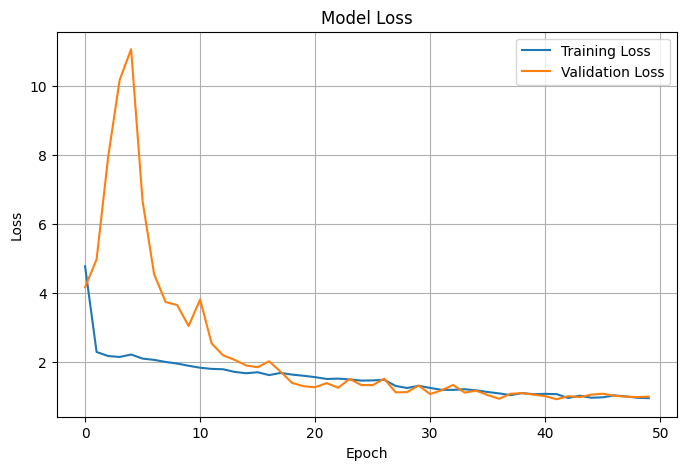

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

The code uses load_model to retrieve the second model that achieved the best performance during the training phase.

In [ ]:
from tensorflow.keras.models import load_model
from keras.config import enable_unsafe_deserialization

enable_unsafe_deserialization()

# load model
best_model = load_model('./models/best_transfer_model.keras')


Using Matplotlib the code generates two separate plots: one illustrating how both the training and validation accuracy changed across the training epochs, and another showing the progression of both the training and validation loss over the same epochs. As seen from the visualizations, the model accuracy increases for both training and validation sharply up to epoch 15 then the growth slows down. Overall, the accuracy is slightly higher for the training set however the gap isn't too big. The loss also decreseas greatly until epoch 15 then it stabilizes but continues to decrease. The training loss is slightly lower than the test set which is expected.

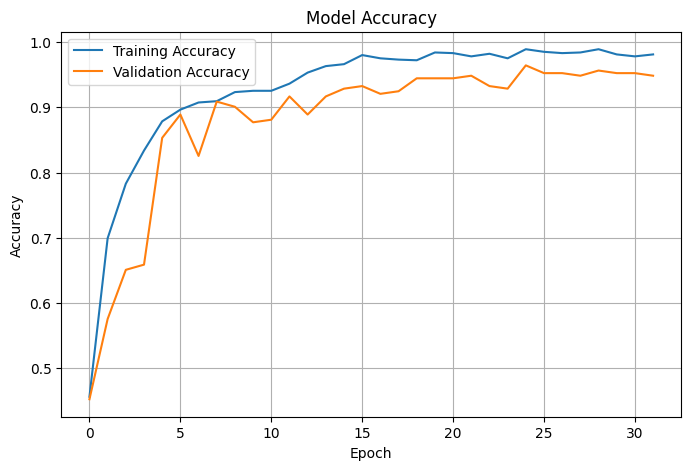

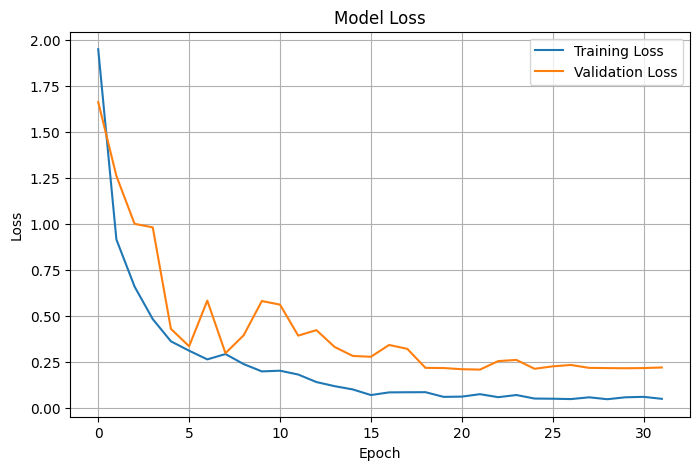

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

This block evaluates the trained model's performance on the unseen test dataset. It utilizes the true and predicted labels to print a detailed classification report, providing metrics like precision, recall, and F1-score for each font class, and visualizes the confusion matrix as a heatmap to clearly show how many samples from each true font class were correctly or incorrectly classified into other font classes. Most classes have near-perfect or perfect precision, recall, and F1-scores (e.g., 'aureus', 'cicero'). Some classes have slightly lower, though still very good, scores (e.g., 'augustus' (0.91 F1)). This level of performance per class is very strong. The vast majority of test samples are classified correctly.

2/8 ━━━━━━━━━━━━━━━━━━━━ 45s 8s/step 

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 56s 7s/step
              precision    recall  f1-score   support

    augustus       0.91      0.91      0.91        22
      aureus       0.97      1.00      0.98        29
      cicero       0.96      1.00      0.98        27
   colosseum       0.96      1.00      0.98        23
      consul       1.00      1.00      1.00        22
       forum       1.00      1.00      1.00        17
      laurel       1.00      0.94      0.97        18
       roman       0.96      0.88      0.92        26
     senatus       0.96      0.92      0.94        24
      trajan       1.00      1.00      1.00        20
       vesta       0.92      0.96      0.94        24

    accuracy                           0.96       252
   macro avg       0.97      0.96      0.97       252
weighted avg       0.96      0.96      0.96       252



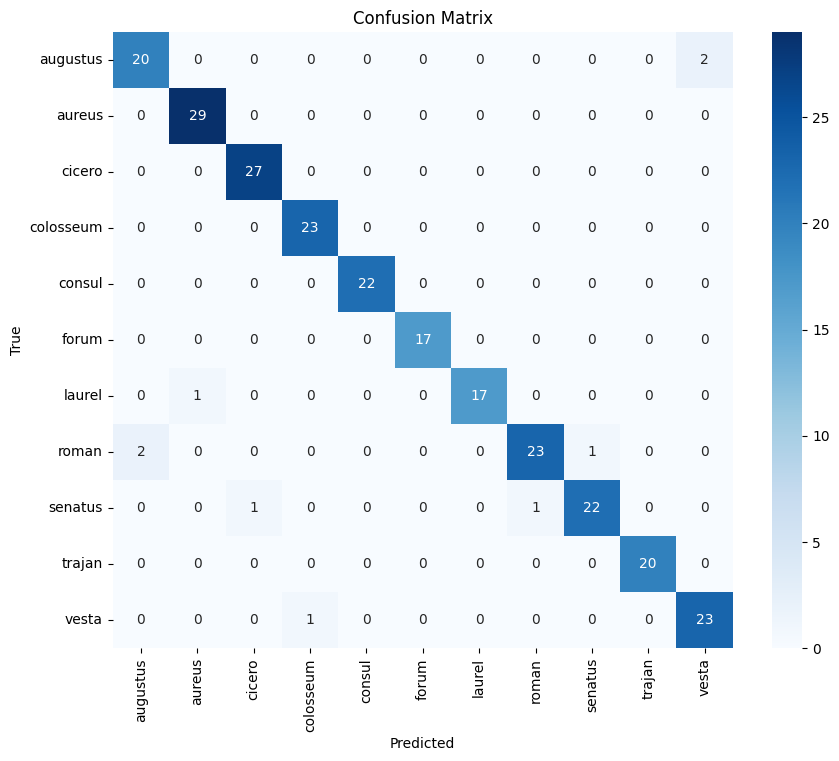

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Reset generator to ensure predictions match labels
test_data.reset()

# Get predictions
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels)
    if len(y_true) >= len(test_data.filenames):
        break

y_true = np.array(y_true).astype(int)

# Class labels
class_names = [id_to_font[i] for i in sorted(id_to_font.keys())]

# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


It uses the trained model to generate predictions for all images in the test set, converting the model's probability outputs into predicted class IDs. It then attempts to retrieve the true labels for these images directly from the test data generator's labels attribute

In [ ]:
# Predict on the test set
y_pred_probs = model.predict(test_data)
predicted_classes = np.argmax(y_pred_probs, axis=1)

# True labels from the generator
true_classes = test_data.labels

2/8 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step  

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (103803147 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step


Now, it visualizes the model's accuracy for each individual font class on the test set, using a bar plot. As represented by the bars, the model achieves very high accuracy for most font classes, with several reaching perfect or near-perfect 1.0 accuracy (e.g., 'aureus', 'cicero'). Other classes, while still having high accuracy generally above 0.9 (like 'augustus', 'roman'), show slightly lower bars.

8/8 ━━━━━━━━━━━━━━━━━━━━ 58s 7s/step


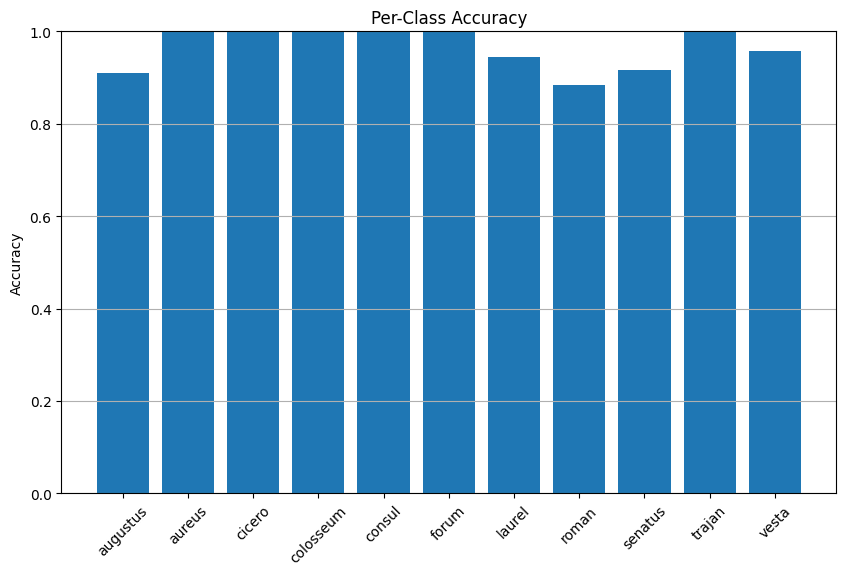

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predict
y_pred_probs = model.predict(test_data)
predicted_classes = np.argmax(y_pred_probs, axis=1)
true_classes = test_data.labels

# Class names in the order of their labels
class_names = [
    'augustus', 'aureus', 'cicero', 'colosseum', 'consul',
    'forum', 'laurel', 'roman', 'senatus', 'trajan', 'vesta'
]

# Calculate per-class accuracy
per_class_accuracy = []
for i in range(len(class_names)):
    idx = np.where(true_classes == i)[0]
    acc = accuracy_score(true_classes[idx], predicted_classes[idx])
    per_class_accuracy.append(acc)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(class_names, per_class_accuracy)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.title('Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

This code block analyzes the confusion matrix to pinpoint the most common types of errors made by the model on the test set. It then prints the top 10 worst mistakes, showing which font was most often misclassified. The list shows that the most common errors were a 'roman' font image being predicted as 'augustus', and an 'augustus' font image being predicted as 'vesta', both occurring just twice. there were fewer than 10 unique pairs of classes where errors occurred, in fact some mistake equal 0.

In [ ]:
from sklearn.metrics import confusion_matrix

# Build confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Set the diagonal to zero (because correct predictions are not mistakes)
np.fill_diagonal(cm, 0)

# Find the top 10 highest confusion errors
mistake_indices = np.dstack(np.unravel_index(np.argsort(cm.ravel())[::-1], cm.shape))[0]

print("\nTop 10 worst mistakes:")
for i in range(10):
    true_label, predicted_label = mistake_indices[i]
    count = cm[true_label, predicted_label]
    print(f"- True: {class_names[true_label]} → Predicted: {class_names[predicted_label]} (Mistakes: {count})")


Top 10 worst mistakes:
- True: roman → Predicted: augustus (Mistakes: 2)
- True: augustus → Predicted: vesta (Mistakes: 2)
- True: senatus → Predicted: cicero (Mistakes: 1)
- True: senatus → Predicted: roman (Mistakes: 1)
- True: roman → Predicted: senatus (Mistakes: 1)
- True: vesta → Predicted: colosseum (Mistakes: 1)
- True: laurel → Predicted: aureus (Mistakes: 1)
- True: vesta → Predicted: roman (Mistakes: 0)
- True: vesta → Predicted: vesta (Mistakes: 0)
- True: vesta → Predicted: aureus (Mistakes: 0)


The code tries to visualize some of the specific images from the test set that the model misclassified. But from the output all prediction in the batch were correct.

In [ ]:
# 4. Find wrong predictions
wrong_indices = np.where(predicted_classes != true_classes)[0]

# Check if there are any wrong predictions
if len(wrong_indices) == 0:
    print("✅ All predictions in this batch are correct!")
else:
    plt.figure(figsize=(20, 10))
    for idx, wrong_idx in enumerate(wrong_indices[:10]):
        # Get image path
        file_path = test_data.filepaths[test_data.batch_index * test_data.batch_size + wrong_idx]

        # Preprocess
        try:
            processed_img = preprocess_image(file_path, size=(512, 512))
        except Exception as e:
            print(f"❌ Failed to load {file_path}: {e}")
            processed_img = np.zeros((512, 512))

        plt.subplot(2, 5, idx + 1)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"True: {class_names[true_classes[wrong_idx]]}\nPred: {class_names[predicted_classes[wrong_idx]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()


✅ All predictions in this batch are correct!
